In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# configures format of images
%config InlineBackend.figure_format = 'svg'
# allows render in Jupyter notebook
%matplotlib inline

sns.set(font_scale=0.8)

In [16]:
# read cleaned data into data frame

df = pd.read_csv('output_stage2.csv', parse_dates=['DATETIME'])
df.drop(['Unnamed: 0'], axis =1, inplace=True)
df['TOTAL'] = df['ENTRY_DIFF'] + df['EXIT_DIFF']
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,H007,R248,00-00-00,1 AV,L,BMT,06/02/2018,04:00:00,REGULAR,13591820,15231266,2018-06-02 04:00:00,138.0,284.0,422.0
1,H007,R248,00-00-00,1 AV,L,BMT,06/02/2018,08:00:00,REGULAR,13591901,15231570,2018-06-02 08:00:00,81.0,304.0,385.0


In [29]:
df.dtypes

STATION        object
DATE           object
ENTRIES         int64
EXITS           int64
ENTRY_DIFF    float64
EXIT_DIFF     float64
TOTAL         float64
dtype: object

In [31]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

STATION               object
DATE          datetime64[ns]
ENTRIES                int64
EXITS                  int64
ENTRY_DIFF           float64
EXIT_DIFF            float64
TOTAL                float64
dtype: object

In [18]:
df = df.groupby(['STATION', 'DATE']).sum().reset_index()
df.head(10)

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,1 AV,06/02/2018,15186952700,8126593144,15077.0,16756.0,31833.0
1,1 AV,06/03/2018,18224444318,9752027926,16096.0,19088.0,35184.0
2,1 AV,06/04/2018,18224546565,9752148265,21458.0,23273.0,44731.0
3,1 AV,06/05/2018,18224676258,9752287142,20499.0,22735.0,43234.0
4,1 AV,06/06/2018,21713370624,11819162045,23524.0,24799.0,48323.0
5,1 AV,06/07/2018,18224945475,9752575200,21945.0,23644.0,45589.0
6,1 AV,06/08/2018,18225081138,9752723386,23769.0,25782.0,49551.0
7,1 AV,06/09/2018,18225219933,9752866179,19888.0,20218.0,40106.0
8,1 AV,06/10/2018,18225325824,9752981923,15469.0,17958.0,33427.0
9,1 AV,06/11/2018,18225423417,9753095188,20779.0,22648.0,43427.0


In [21]:
# top stations
stations_list = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST', \
                 '14 ST-UNION SQ', 'TIMES SQ-42 ST', 'FULTON ST', '86 ST', \
                '42 ST-PORT AUTH', '59 ST COLUMBUS']

# filters by checking to see if element in dataframe matches an element in stations list
df2 = df.loc[df['STATION'].isin(stations_list)].reset_index()

df2.head(6)

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,392,14 ST-UNION SQ,06/02/2018,4170761781,1389961838,62623.0,72427.0,135050.0
1,393,14 ST-UNION SQ,06/03/2018,5007815570,1668379968,65333.0,66982.0,132315.0
2,394,14 ST-UNION SQ,06/04/2018,5002344754,1665601488,98813.0,88972.0,187785.0
3,395,14 ST-UNION SQ,06/05/2018,4940071402,1647648429,108409.0,92755.0,201164.0
4,396,14 ST-UNION SQ,06/06/2018,5397049620,1749247216,112220.0,95072.0,207292.0
5,397,14 ST-UNION SQ,06/07/2018,4938599137,1651841990,108307.0,94451.0,202758.0


In [32]:
df2['WEEK_OF_YEAR'] = df['DATE'].dt.week
df2.head(10)

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL,WEEK_OF_YEAR
0,392,14 ST-UNION SQ,06/02/2018,4170761781,1389961838,62623.0,72427.0,135050.0,22
1,393,14 ST-UNION SQ,06/03/2018,5007815570,1668379968,65333.0,66982.0,132315.0,22
2,394,14 ST-UNION SQ,06/04/2018,5002344754,1665601488,98813.0,88972.0,187785.0,23
3,395,14 ST-UNION SQ,06/05/2018,4940071402,1647648429,108409.0,92755.0,201164.0,23
4,396,14 ST-UNION SQ,06/06/2018,5397049620,1749247216,112220.0,95072.0,207292.0,23
5,397,14 ST-UNION SQ,06/07/2018,4938599137,1651841990,108307.0,94451.0,202758.0,23
6,398,14 ST-UNION SQ,06/08/2018,5008361244,1664653057,110370.0,95247.0,205617.0,23
7,399,14 ST-UNION SQ,06/09/2018,5006960529,1669982590,79030.0,67672.0,146702.0,23
8,400,14 ST-UNION SQ,06/10/2018,5006767601,1670450166,59050.0,53309.0,112359.0,23
9,401,14 ST-UNION SQ,06/11/2018,4940079246,1653777056,99562.0,87815.0,187377.0,24


In [33]:
# create data frame for visualization
data = df2[['STATION','WEEK_OF_YEAR','TOTAL']].groupby(['STATION','WEEK_OF_YEAR'])[['TOTAL']].mean()
data = data.reset_index()
data.head()

,STATION,WEEK_OF_YEAR,TOTAL
0,14 ST-UNION SQ,22,133682.500000
1,14 ST-UNION SQ,23,180525.285714
2,14 ST-UNION SQ,24,179455.000000
3,14 ST-UNION SQ,25,182090.142857
4,14 ST-UNION SQ,26,193985.000000


In [34]:
# create a pivot table to pass into seaborn heatmap
df_data = pd.pivot_table(data=data,
                         index='STATION',
                         values='TOTAL',
                         columns='WEEK_OF_YEAR'
                        )
df_data.head()

WEEK_OF_YEAR,22,23,24,25,26
STATION,,,,,
14 ST-UNION SQ,133682.5,180525.285714,179455.000000,182090.142857,193985.0
23 ST,67501.0,164245.142857,161136.571429,167106.857143,193834.2
34 ST-HERALD SQ,84683.5,183744.000000,192155.714286,193281.571429,221875.8
34 ST-PENN STA,144945.5,269367.142857,267813.714286,272837.285714,318721.8
42 ST-PORT AUTH,99524.5,145608.714286,143974.571429,144983.714286,159437.6


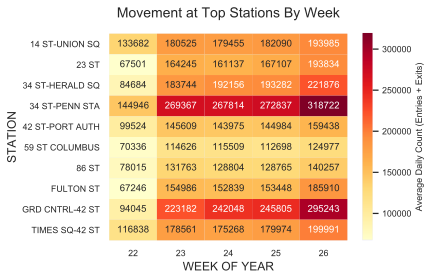

In [35]:
# create heatmap
ax = plt.axes()

sns.heatmap(df_data,
            fmt=".0f",
            cmap='inferno',
            annot=True,
            cbar_kws={'label': "Average Daily Count (Entries + Exits)"},
            ax = ax
           )

ax.figure.axes[-1].yaxis.label.set_size(9)
ax.set_title('Movement at Top Stations By Week', fontsize=14)
ax.title.set_position([.5, 1.05])
plt.xlabel('WEEK OF YEAR', fontsize=12)
plt.ylabel('STATION', fontsize=12);
# plt.text(0,10, '*movement = average daily [entries + exits]', fontsize=8, fontstyle='italic')
plt.tight_layout()

plt.savefig('heatmap_fig.pdf', transparent=True);